# Practica 1 Aprendizaje Automatico

## Analisis de Datos Exploratorio

In [38]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [39]:
df = pd.read_csv('Datos/wind_ava.csv', index_col=0)
df.head()

,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,p54.162.9,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,2.505940e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,2.508339e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,2.504882e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,2.505904e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,2.501015e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986


### Limpieza de los datos

Eliminar todos los molinos que no son sotavento (terminan en !=13)

In [40]:
# Eliminar todos los molinos que no son sotavento (borrar todas las columnas que no terminen en 13)
df = df[df.columns[df.columns.str.endswith('13')]]
df.head()

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


Comprobaremos si hay datos nulos o con insuficientes valores imprimiendo por pantalla la información del dataframe

In [41]:
df.describe()

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,...,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,286.666391,...,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,6.414325,...,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,273.498473,...,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,281.809651,...,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,286.063980,...,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,291.173637,...,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395
max,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,305.043177,...,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4748 entries, 2005-01-02 18:00:00 to 2009-12-31 18:00:00
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p54.162.13  4748 non-null   float64
 1   p55.162.13  4748 non-null   float64
 2   cape.13     4748 non-null   float64
 3   p59.162.13  4748 non-null   float64
 4   lai_lv.13   4748 non-null   float64
 5   lai_hv.13   4748 non-null   float64
 6   u10n.13     4748 non-null   float64
 7   v10n.13     4748 non-null   float64
 8   sp.13       4748 non-null   float64
 9   stl1.13     4748 non-null   float64
 10  u10.13      4748 non-null   float64
 11  v10.13      4748 non-null   float64
 12  t2m.13      4748 non-null   float64
 13  stl2.13     4748 non-null   float64
 14  stl3.13     4748 non-null   float64
 15  iews.13     4748 non-null   float64
 16  inss.13     4748 non-null   float64
 17  stl4.13     4748 non-null   float64
 18  fsr.13      4748 non-null   float64
 19 

In [43]:
# comprobar si hay columnas constantes
print(df.columns[df.nunique() == 1].tolist())

[]


In [57]:
# Verificar si hay valores NaN en los datos
nan_in_data = df.isna().any()
print(nan_in_data)

p54.162.13    False
p55.162.13    False
cape.13       False
p59.162.13    False
lai_lv.13     False
lai_hv.13     False
u10n.13       False
v10n.13       False
sp.13         False
stl1.13       False
u10.13        False
v10.13        False
t2m.13        False
stl2.13       False
stl3.13       False
iews.13       False
inss.13       False
stl4.13       False
fsr.13        False
flsr.13       False
u100.13       False
v100.13       False
dtype: bool


In [44]:
# comprobar que variables son categoricas y cuales son numericas
categorical = df.columns[df.dtypes == 'object'].tolist()
numerical = df.columns[df.dtypes != 'object'].tolist()
print(categorical)
print(numerical)
print(df.nunique())


[]
['p54.162.13', 'p55.162.13', 'cape.13', 'p59.162.13', 'lai_lv.13', 'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13', 'stl1.13', 'u10.13', 'v10.13', 't2m.13', 'stl2.13', 'stl3.13', 'iews.13', 'inss.13', 'stl4.13', 'fsr.13', 'flsr.13', 'u100.13', 'v100.13']
p54.162.13    4441
p55.162.13    4425
cape.13       1325
p59.162.13    4196
lai_lv.13     1468
lai_hv.13     1435
u10n.13       4395
v10n.13       4396
sp.13         4167
stl1.13       4477
u10.13        4361
v10.13        4387
t2m.13        4469
stl2.13       4517
stl3.13       4511
iews.13       3934
inss.13       3999
stl4.13       4560
fsr.13        2306
flsr.13       3650
u100.13       4387
v100.13       4429
dtype: int64


Podemos ver que son todas categoricas, lo cual se confirma viendo la cantidad de valores unicos de cada variable

### Estudio de la calidad de las variables

Ahora, exploraremos entre las variables cuáles son las que aportan más a la variable dependiente,
en nuestro caso "cape.13".

matriz de correlacion con la variable objetivo

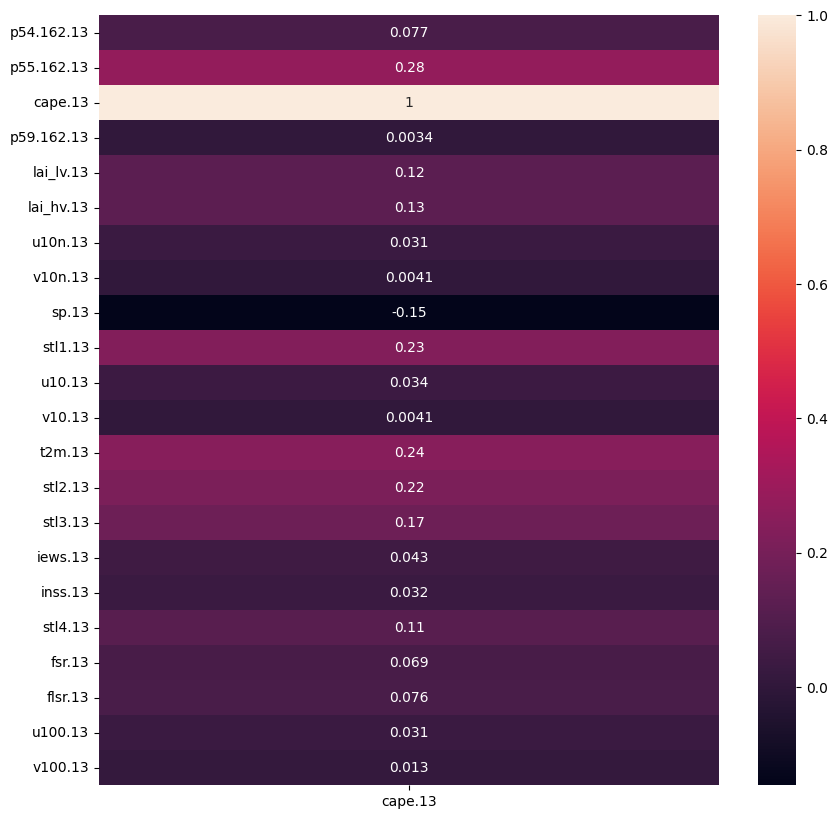

In [45]:
# estudio de la calidad de los datos
# matriz de correlacion
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation[['cape.13']], annot=True)
plt.show()

Matriz de correlacion de las variables entre si

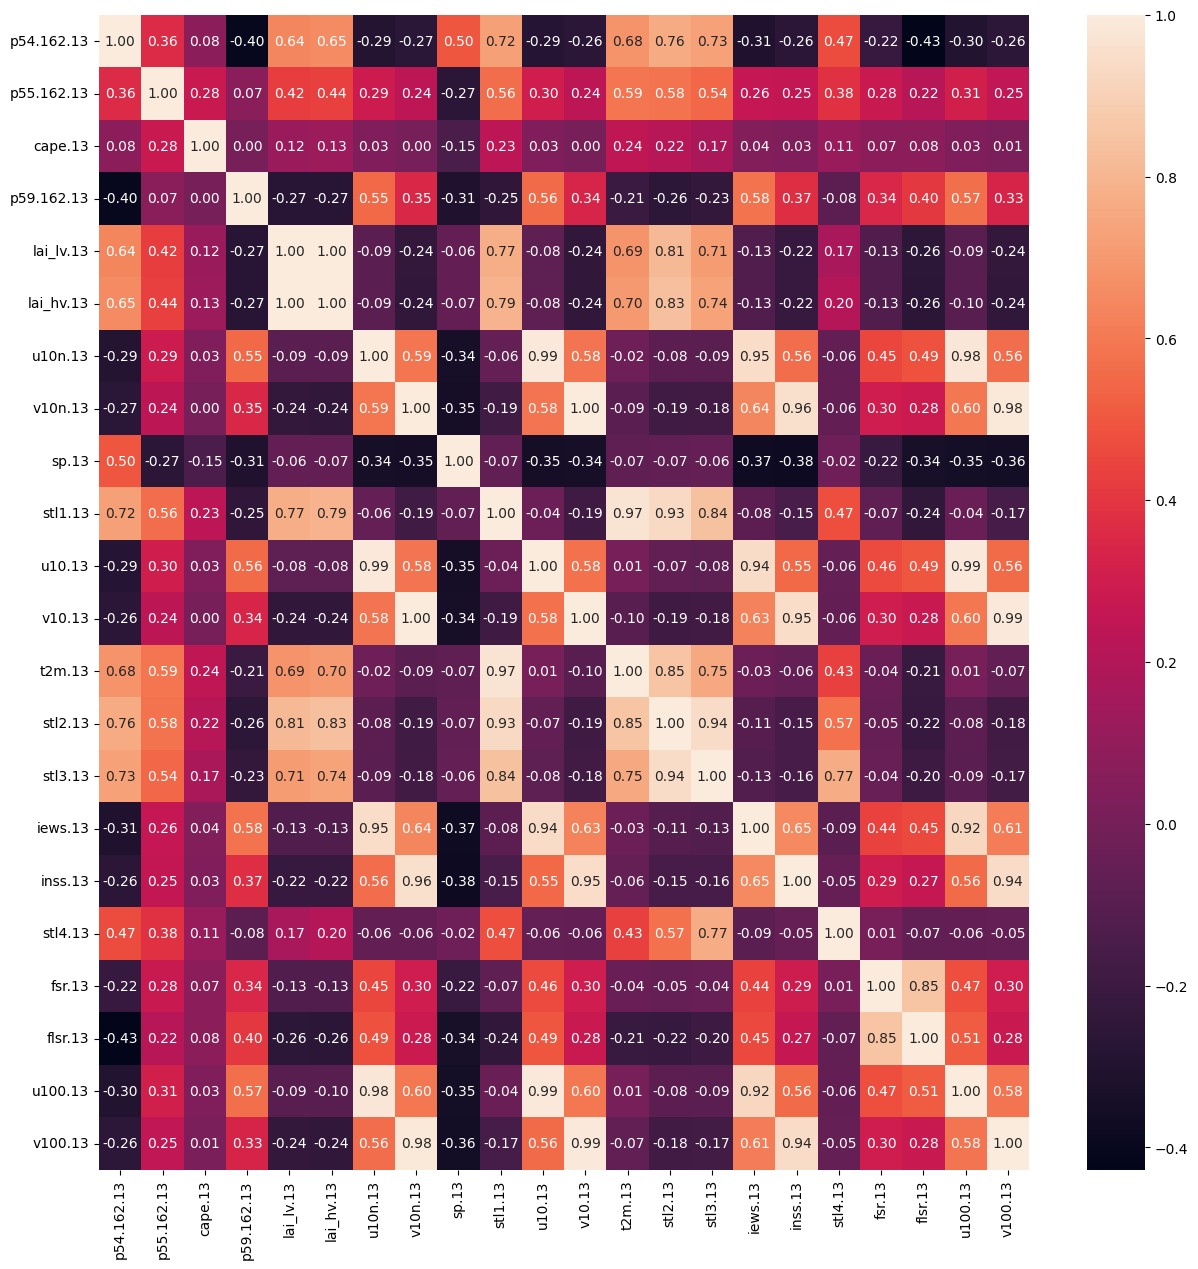

In [46]:
# matriz de correlacion de todas las variables
correlation = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()


In [47]:
# see what variables are correlated with cape.13
correlation_cape13 = abs(correlation['cape.13']).sort_values(ascending=False)
correlation_cape13

cape.13       1.000000
p55.162.13    0.275533
t2m.13        0.243220
stl1.13       0.233210
stl2.13       0.215031
stl3.13       0.173513
sp.13         0.146495
lai_hv.13     0.128238
lai_lv.13     0.123329
stl4.13       0.113361
p54.162.13    0.076709
flsr.13       0.075812
fsr.13        0.069333
iews.13       0.042621
u10.13        0.033782
inss.13       0.032277
u100.13       0.031293
u10n.13       0.030579
v100.13       0.013124
v10n.13       0.004093
v10.13        0.004071
p59.162.13    0.003355
Name: cape.13, dtype: float64

In [48]:
import pprint as pp

correlation = df.corr()
# Para cada columna, encuentra las 3 variables más correlacionadas
correlation_dict = {}
for col in correlation.columns:
    correlation_dict[col] = correlation[col].sort_values(ascending=False)[1:4].to_dict()

pp.pprint(correlation_dict)

{'cape.13': {'p55.162.13': 0.27553282449422056,
             'stl1.13': 0.23320990378315648,
             't2m.13': 0.24321989339266217},
 'flsr.13': {'fsr.13': 0.8513898477312147,
             'u10.13': 0.4938035807940866,
             'u100.13': 0.513567300345785},
 'fsr.13': {'flsr.13': 0.8513898477312147,
            'u10.13': 0.4593209844127694,
            'u100.13': 0.47350676387771373},
 'iews.13': {'u10.13': 0.9391773235690463,
             'u100.13': 0.9237940910401499,
             'u10n.13': 0.9478208283502696},
 'inss.13': {'v10.13': 0.9480204353107974,
             'v100.13': 0.9391045922280462,
             'v10n.13': 0.9558746848828626},
 'lai_hv.13': {'lai_lv.13': 0.9986147399001334,
               'stl1.13': 0.7895984718684155,
               'stl2.13': 0.8337276229903379},
 'lai_lv.13': {'lai_hv.13': 0.9986147399001334,
               'stl1.13': 0.77376240653188,
               'stl2.13': 0.8141160305641802},
 'p54.162.13': {'stl1.13': 0.7233776081396844,
           

Analisis univariado

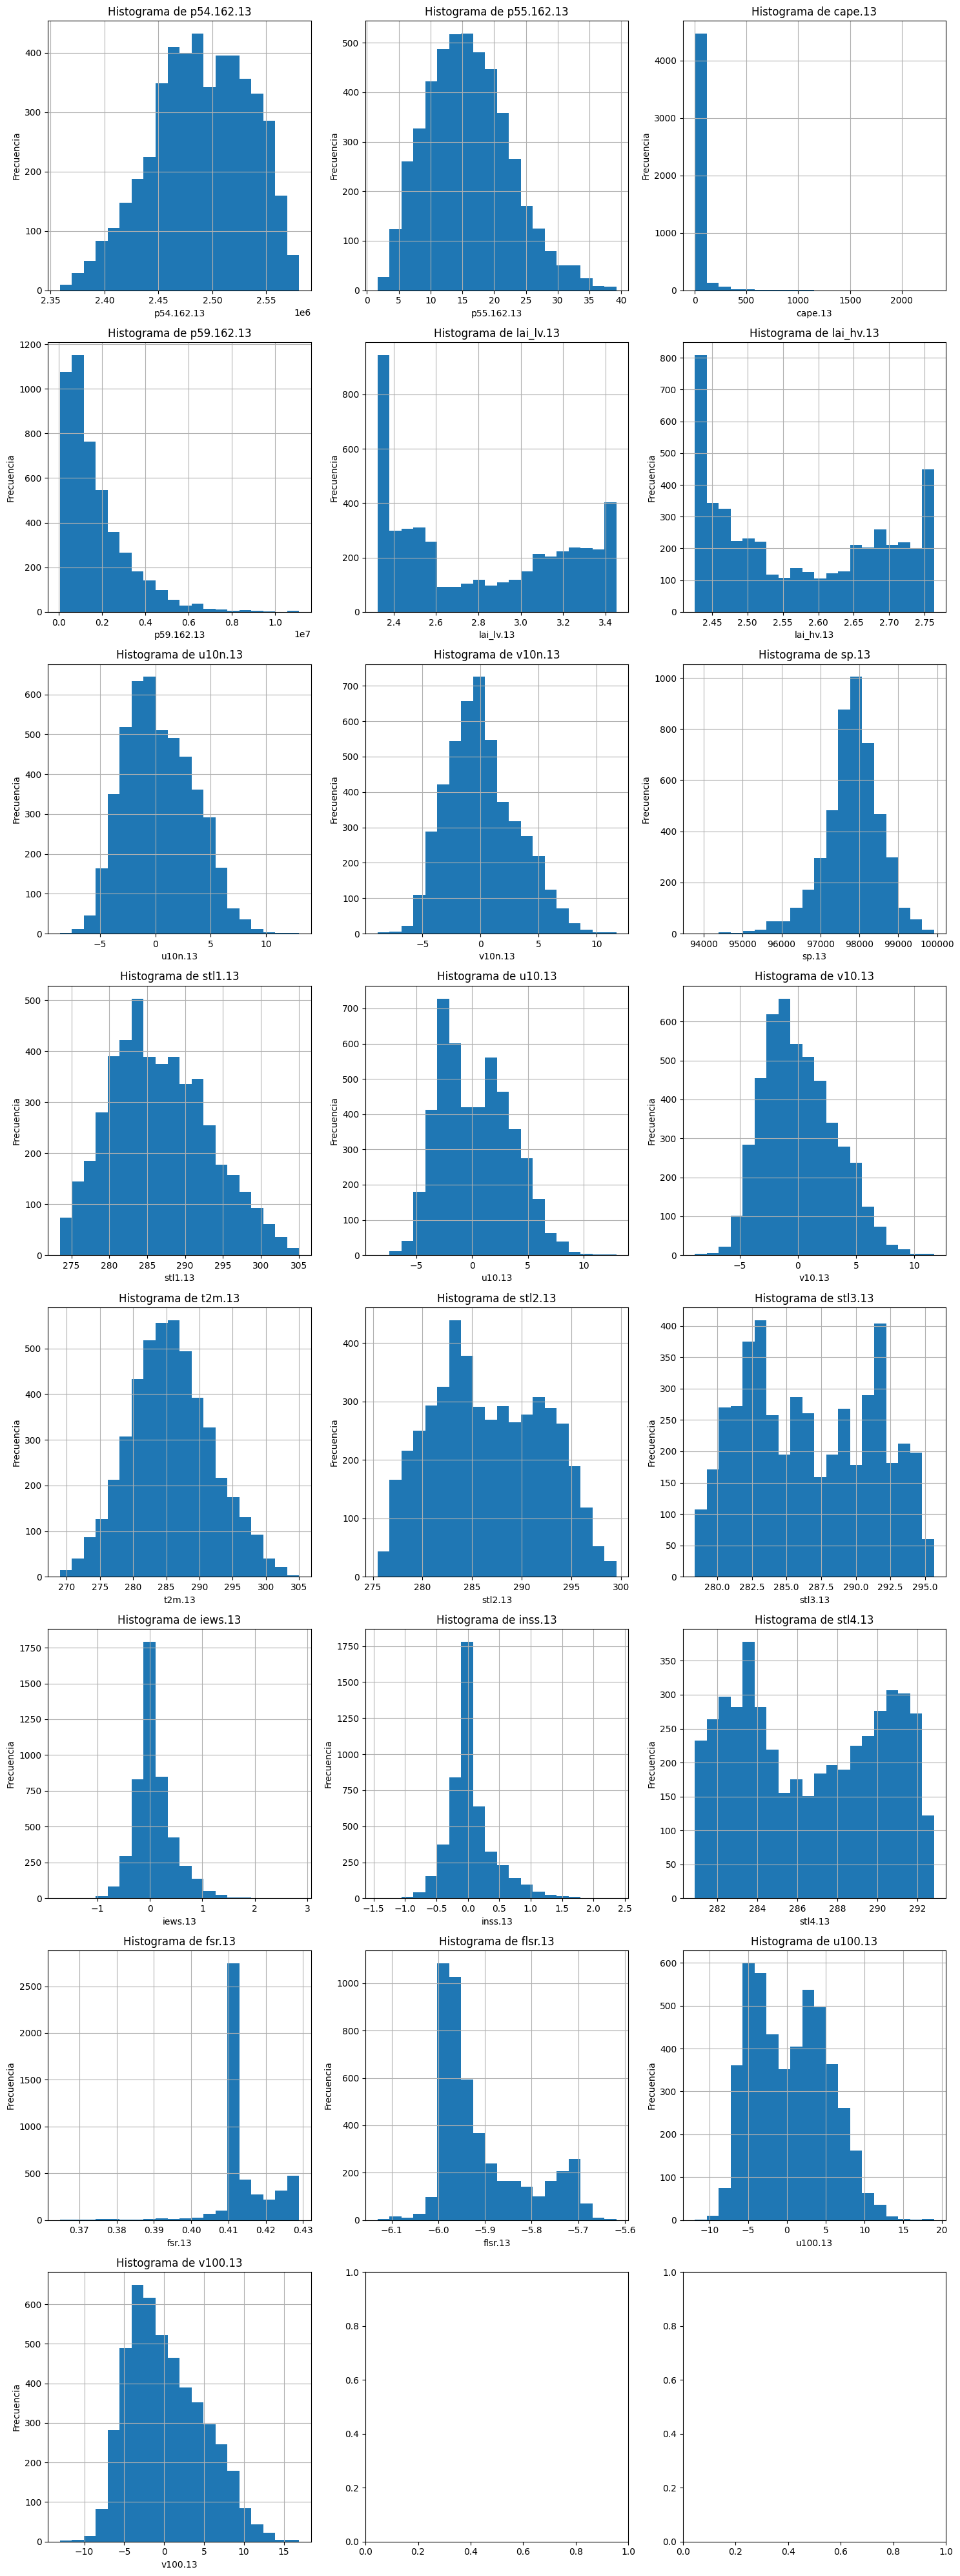

In [49]:
columnas = df.columns

# Calcular el número de filas y columnas para la matriz de subplots
num_columnas = 3  # El número de histogramas por fila
num_filas = (len(columnas) + num_columnas - 1) // num_columnas  # Redondeo hacia arriba de la división

# Crear la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))  # Ajusta el tamaño según el número de columnas y filas

# Iterar sobre cada columna y generar un histograma en su subplot correspondiente
for i, columna in enumerate(columnas):
    fila = i // num_columnas  # Calcular la fila actual
    columna_subplot = i % num_columnas  # Calcular la columna actual
    ax = axs[fila, columna_subplot] if num_filas > 1 else axs[columna_subplot]  # Acceder al subplot correspondiente
    df[columna].hist(ax=ax, bins=20)  # Crear el histograma en el subplot
    ax.set_title('Histograma de ' + columna)  # Añadir título al histograma
    ax.set_xlabel(columna)  # Etiqueta del eje x
    ax.set_ylabel('Frecuencia')  # Etiqueta del eje y

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la matriz de subplots
plt.show()


In [71]:
# Evaluación de la relevancia (filter) y la independencia (wrapper) de las variables
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en variables predictoras y variable objetivo
X = df.drop('cape.13', axis=1)
y = df['cape.13']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)

# Calcular el valor F y el p-valor para cada variable
f_values, p_values = f_regression(X_train, y_train)

# Crear un DataFrame con los resultados
results = pd.DataFrame({'Variable': X.columns, 'F': f_values, 'p-value': p_values})

# Ordenar el DataFrame por el p-valor
results.sort_values('p-value')

# Seleccionar las 3 variables más relevantes
selector = SelectKBest(f_regression, k=3)

# Entrenar el selector con los datos de entrenamiento
selector.fit(X_train, y_train)

# Obtener las variables seleccionadas
selected_columns = X.columns[selector.get_support()]

# Mostrar las variables seleccionadas
selected_columns


Error cuadrático medio: 11224.079159943003


Index(['p55.162.13', 'stl1.13', 't2m.13'], dtype='object')

In [72]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Convertir variable dependiente continua en clases discretas (por ejemplo, binarización)
bins = np.linspace(df['cape.13'].min(), df['cape.13'].max(), 10)  # Puedes ajustar el número de bins
df['cape.13_discrete'] = pd.cut(df['cape.13'], bins=bins, labels=False)

# Variables independientes y dependiente
X = df.drop(['cape.13', 'cape.13_discrete'], axis=1)
y = df['cape.13_discrete']

# Calcular la ganancia de información (mutual information) para cada variable
info_gain = mutual_info_classif(X, y)

# Calcular la entropía de la variable dependiente
target_entropy = mutual_info_classif(y.values.reshape(-1, 1), y)[0]

# Calcular el "gain ratio"
gain_ratio = info_gain / target_entropy

# Crear un DataFrame con los nombres de las variables y sus "gain ratio"
gain_ratio_df = pd.DataFrame({'Variable': X.columns, 'Gain_Ratio': gain_ratio})

# Ordenar el DataFrame por "gain ratio" en orden descendente
gain_ratio_df = gain_ratio_df.sort_values(by='Gain_Ratio', ascending=False)

# Visualizar el "gain ratio" en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(gain_ratio_df['Variable'], gain_ratio_df['Gain_Ratio'], color='lightcoral')
plt.xlabel('Variables')
plt.ylabel('Gain Ratio')
plt.title('Gain Ratio de Variables con respecto a "cape.13_discrete"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


c:\Users\defal\Documents\Aprendizaje-automatico\.venv\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

#TODO
SACAR CONCLUSIONES.